In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
os.getcwd()

'/Users/regan/Documents/Springboard/Capstone2.0'

In [3]:
#show all columns
from IPython.display import display

pd.set_option('display.max_columns', None)

In [4]:
#load cleaned dataset 
pbp = pd.read_csv('pbp_active_cleaned2.csv')
pbp=pbp.rename(columns={'activeteam':'offense','active_conf':'off_conf'})
pbp.head()

gameid               hometeam                awayteam     playid  \
0  401110730   tennessee volunteers  georgia state panthers  104857801   
1  401110730   tennessee volunteers  georgia state panthers  104994406   
2  401110730   tennessee volunteers  georgia state panthers  101884406   
3  401110730   tennessee volunteers  georgia state panthers  101979201   
4  401110732  vanderbilt commodores        georgia bulldogs  102876901   

                 offense          nonactive team  drive #  quarter  sec  \
0   tennessee volunteers  georgia state panthers        8        4  861   
1   tennessee volunteers  georgia state panthers       12        4   55   
2   tennessee volunteers  georgia state panthers        2        1  715   
3   tennessee volunteers  georgia state panthers        3        1  127   
4  vanderbilt commodores        georgia bulldogs        2        2  750   

   homescore  awayscore  down  distance  yardstoendzone    zone  \
0         20         21     1        10              76   GREEN   
1         23         38     3         4              36  ORANGE   
2          0          7     3         4              62   GREEN   
3          7          7     1        10              46  YELLOW   
4          0         14     3        31              62   GREEN   

                   qb  pass yds                receiver  recyds runner  \
0  Jarrett Guarantano      54.0  Dominick Wood-Anderson    54.0    NaN   
1  Jarrett Guarantano      18.0  Dominick Wood-Anderson    18.0    NaN   
2  Jarrett Guarantano       7.0  Dominick Wood-Anderson     7.0    NaN   
3  Jarrett Guarantano       0.0  Dominick Wood-Anderson     0.0    NaN   
4          Riley Neal       5.0  Justice Shelton-Mosley     5.0    NaN   

   runyds kicker  kickyds kickreturner  kickretyds placekicker  pkyds  \
0     NaN    NaN      NaN          NaN         NaN         NaN    NaN   
1     NaN    NaN      NaN          NaN         NaN         NaN    NaN   
2     NaN    NaN      NaN          NaN         NaN         NaN    NaN   
3     NaN    NaN      NaN          NaN         NaN         NaN    NaN   
4     NaN    NaN      NaN          NaN         NaN         NaN    NaN   

  pkresult  penalty  int  fumble  td xp result two pt result  week home_conf  \
0      NaN        0    0       0   0       NaN           NaN     1       sec   
1      NaN        0    0       0   0       NaN           NaN     1       sec   
2      NaN        0    0       0   0       NaN           NaN     1       sec   
3      NaN        0    0       0   0       NaN           NaN     1       sec   
4      NaN        0    0       0   0       NaN           NaN     1       sec   

  away_conf off_conf  home_rank  away_rank  pass  run  yards  scored  \
0       NaN      sec        NaN        NaN     1    0   54.0     0.0   
1       NaN      sec        NaN        NaN     1    0   18.0     0.0   
2       NaN      sec        NaN        NaN     1    0    7.0     0.0   
3       NaN      sec        NaN        NaN     1    0    0.0     0.0   
4       sec      sec        NaN        3.0     1    0    5.0     0.0   

  gain_loss  is_home  off_team_score  def_team_score  off_team_rank  \
0      gain      1.0            20.0            21.0            NaN   
1      gain      1.0            23.0            38.0            NaN   
2      gain      1.0             0.0             7.0            NaN   
3  no yards      1.0             7.0             7.0            NaN   
4      gain      1.0             0.0            14.0            NaN   

   def_team_rank run_pass rank_group rank_group_def  
0            NaN     pass   unranked       unranked  
1            NaN     pass   unranked       unranked  
2            NaN     pass   unranked       unranked  
3            NaN     pass   unranked       unranked  
4            3.0     pass   unranked          top 5

In [5]:
#keep only relevant columns
pbp = pbp[['offense', 'drive #', 'quarter',
                  'down','distance','yardstoendzone','zone','penalty','int','fumble','week',
                  'off_conf','yards','scored','gain_loss','is_home','def_team_score','off_team_score',
           'run_pass','rank_group','rank_group_def']]

In [6]:
#check for missing values 
pbp.isna().sum()

offense           0
drive #           0
quarter           0
down              0
distance          0
yardstoendzone    0
zone              0
penalty           0
int               0
fumble            0
week              0
off_conf          0
yards             0
scored            0
gain_loss         0
is_home           0
def_team_score    0
off_team_score    0
run_pass          0
rank_group        0
rank_group_def    0
dtype: int64

In [7]:
pbp.dtypes

offense            object
drive #             int64
quarter             int64
down                int64
distance            int64
yardstoendzone      int64
zone               object
penalty             int64
int                 int64
fumble              int64
week                int64
off_conf           object
yards             float64
scored            float64
gain_loss          object
is_home           float64
def_team_score    float64
off_team_score    float64
run_pass           object
rank_group         object
rank_group_def     object
dtype: object

<h2 style="background-color:#FAFAD2;"><center><br>Create dummy variables</center>
</h2>

In [8]:
#create dummy variables
pbp_dum = pd.get_dummies(data=pbp, columns=['offense','zone','off_conf','gain_loss','run_pass','rank_group','rank_group_def'])

pbp_dum.head()

drive #  quarter  down  distance  yardstoendzone  penalty  int  fumble  \
0        8        4     1        10              76        0    0       0   
1       12        4     3         4              36        0    0       0   
2        2        1     3         4              62        0    0       0   
3        3        1     1        10              46        0    0       0   
4        2        2     3        31              62        0    0       0   

   week  yards  scored  is_home  def_team_score  off_team_score  \
0     1   54.0     0.0      1.0            21.0            20.0   
1     1   18.0     0.0      1.0            38.0            23.0   
2     1    7.0     0.0      1.0             7.0             0.0   
3     1    0.0     0.0      1.0             7.0             7.0   
4     1    5.0     0.0      1.0            14.0             0.0   

   offense_alabama crimson tide  offense_arkansas razorbacks  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   offense_auburn tigers  offense_florida gators  offense_georgia bulldogs  \
0                      0                       0                         0   
1                      0                       0                         0   
2                      0                       0                         0   
3                      0                       0                         0   
4                      0                       0                         0   

   offense_illinois fighting illini  offense_indiana hoosiers  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

   offense_iowa hawkeyes  offense_kentucky wildcats  offense_lsu tigers  \
0                      0                          0                   0   
1                      0                          0                   0   
2                      0                          0                   0   
3                      0                          0                   0   
4                      0                          0                   0   

   offense_maryland terrapins  offense_michigan state spartans  \
0                           0                                0   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   

   offense_michigan wolverines  offense_minnesota golden gophers  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   offense_mississippi state bulldogs  offense_missouri tigers  \
0                                   0                        0   
1                                   0                        0   
2                                   0                        0   
3                                   0                        0   
4                                   0                        0   

   offense_nebraska cornhuskers  offense_northwestern wildcats  \
0                             0                              0   
1                             0                              0   
2                             0         

In [9]:
pbp_dum.shape

(26540, 69)

<h2 style="background-color:#FAFAD2;"><center><br>Standardization</center>
</h2>

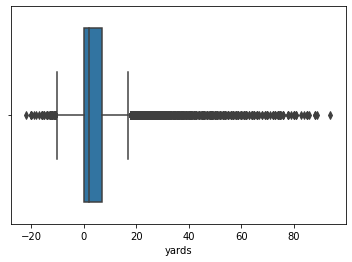

In [10]:
sns.boxplot(x='yards', data=pbp_dum);

In [11]:
#standardize yards

scaler = MinMaxScaler(feature_range=(0,100), copy=True)

pbp_dum['yards_sc'] = scaler.fit_transform(pbp_dum[['yards']].to_numpy())

pbp_dum.head()

drive #  quarter  down  distance  yardstoendzone  penalty  int  fumble  \
0        8        4     1        10              76        0    0       0   
1       12        4     3         4              36        0    0       0   
2        2        1     3         4              62        0    0       0   
3        3        1     1        10              46        0    0       0   
4        2        2     3        31              62        0    0       0   

   week  yards  scored  is_home  def_team_score  off_team_score  \
0     1   54.0     0.0      1.0            21.0            20.0   
1     1   18.0     0.0      1.0            38.0            23.0   
2     1    7.0     0.0      1.0             7.0             0.0   
3     1    0.0     0.0      1.0             7.0             7.0   
4     1    5.0     0.0      1.0            14.0             0.0   

   offense_alabama crimson tide  offense_arkansas razorbacks  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   offense_auburn tigers  offense_florida gators  offense_georgia bulldogs  \
0                      0                       0                         0   
1                      0                       0                         0   
2                      0                       0                         0   
3                      0                       0                         0   
4                      0                       0                         0   

   offense_illinois fighting illini  offense_indiana hoosiers  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

   offense_iowa hawkeyes  offense_kentucky wildcats  offense_lsu tigers  \
0                      0                          0                   0   
1                      0                          0                   0   
2                      0                          0                   0   
3                      0                          0                   0   
4                      0                          0                   0   

   offense_maryland terrapins  offense_michigan state spartans  \
0                           0                                0   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   

   offense_michigan wolverines  offense_minnesota golden gophers  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   offense_mississippi state bulldogs  offense_missouri tigers  \
0                                   0                        0   
1                                   0                        0   
2                                   0                        0   
3                                   0                        0   
4                                   0                        0   

   offense_nebraska cornhuskers  offense_northwestern wildcats  \
0                             0                              0   
1                             0                              0   
2                             0         

In [12]:
#check that scaled values make sense
compare = pbp_dum[['yards','yards_sc']]
compare.head(15)

yards   yards_sc
0    54.0  65.517241
1    18.0  34.482759
2     7.0  25.000000
3     0.0  18.965517
4     5.0  23.275862
5    23.0  38.793103
6     6.0  24.137931
7     0.0  18.965517
8     0.0  18.965517
9     0.0  18.965517
10    0.0  18.965517
11    0.0  18.965517
12   15.0  31.896552
13   15.0  31.896552
14   -1.0  18.103448

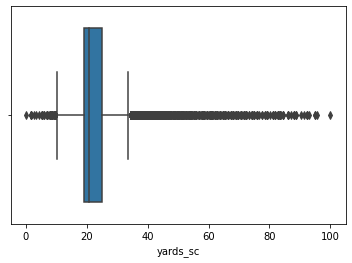

In [13]:
#check boxplot
sns.boxplot(x='yards_sc', data=pbp_dum);

<h3> check other variables for need to standardize

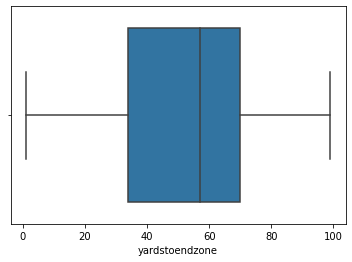

In [45]:
sns.boxplot(x='yardstoendzone', data=pbp_dum);

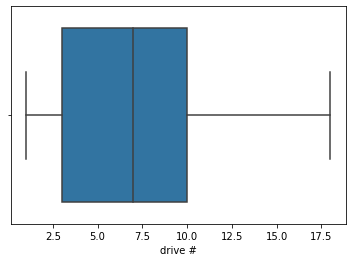

In [46]:
sns.boxplot(x='drive #', data=pbp_dum);

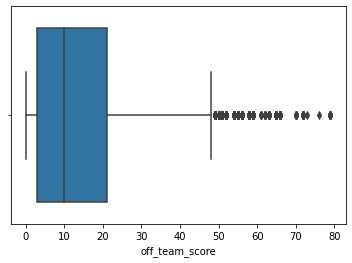

In [47]:
sns.boxplot(x='off_team_score', data=pbp_dum);

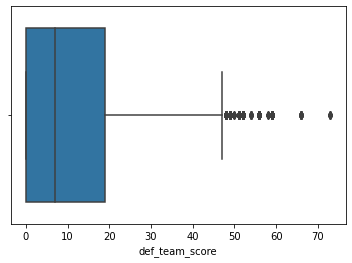

In [48]:
sns.boxplot(x='def_team_score', data=pbp_dum);

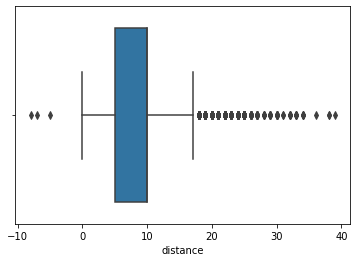

In [49]:
sns.boxplot(x='distance',data=pbp_dum);

<h2 style="background-color:#FAFAD2;"><center><br>Split into train and test sets</center>
</h2>

In [16]:
pbp_dum.head()

drive #  quarter  down  distance  yardstoendzone  penalty  int  fumble  \
0        8        4     1        10              76        0    0       0   
1       12        4     3         4              36        0    0       0   
2        2        1     3         4              62        0    0       0   
3        3        1     1        10              46        0    0       0   
4        2        2     3        31              62        0    0       0   

   week  yards  scored  is_home  def_team_score  off_team_score  \
0     1   54.0     0.0      1.0            21.0            20.0   
1     1   18.0     0.0      1.0            38.0            23.0   
2     1    7.0     0.0      1.0             7.0             0.0   
3     1    0.0     0.0      1.0             7.0             7.0   
4     1    5.0     0.0      1.0            14.0             0.0   

   offense_alabama crimson tide  offense_arkansas razorbacks  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   offense_auburn tigers  offense_florida gators  offense_georgia bulldogs  \
0                      0                       0                         0   
1                      0                       0                         0   
2                      0                       0                         0   
3                      0                       0                         0   
4                      0                       0                         0   

   offense_illinois fighting illini  offense_indiana hoosiers  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

   offense_iowa hawkeyes  offense_kentucky wildcats  offense_lsu tigers  \
0                      0                          0                   0   
1                      0                          0                   0   
2                      0                          0                   0   
3                      0                          0                   0   
4                      0                          0                   0   

   offense_maryland terrapins  offense_michigan state spartans  \
0                           0                                0   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   

   offense_michigan wolverines  offense_minnesota golden gophers  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   offense_mississippi state bulldogs  offense_missouri tigers  \
0                                   0                        0   
1                                   0                        0   
2                                   0                        0   
3                                   0                        0   
4                                   0                        0   

   offense_nebraska cornhuskers  offense_northwestern wildcats  \
0                             0                              0   
1                             0                              0   
2                             0         

<h3> train test split for score

In [17]:
X_score = pbp_dum.drop(columns=['scored'])
y_score = pbp_dum['scored']

In [18]:
X_score_train, X_score_test, y_score_train, y_score_test = train_test_split(X_score, y_score, 
                                                                            test_size=0.33, random_state=42)

print(X_score_train.shape)
print(X_score_test.shape)
print(y_score_train.shape)
print(y_score_test.shape)

(17781, 69)
(8759, 69)
(17781,)
(8759,)


<h3> train test split for gain_loss

Not using yards to predict this

In [20]:
X_gl = pbp_dum.drop(columns=['gain_loss_gain','gain_loss_loss','gain_loss_no yards','yards'])
y_gl = pbp['gain_loss']

X_gl_train, X_gl_test, y_gl_train, y_gl_test = train_test_split(X_gl, y_gl, test_size=0.33, random_state=42)

print(X_gl_train.shape)
print(X_gl_test.shape)
print(y_gl_train.shape)
print(y_gl_test.shape)

(17781, 66)
(8759, 66)
(17781,)
(8759,)


<h3> train test split for yards

Not using gain_loss to predict this

In [21]:
X_yards = pbp_dum.drop(columns = ['gain_loss_gain','gain_loss_loss','gain_loss_no yards','yards'])
y_yards = pbp_dum['yards']

X_yards_train, X_yards_test, y_yards_train, y_yards_test = train_test_split(X_yards, y_yards, 
                                                                            test_size=0.33, random_state=42)

print(X_yards_train.shape)
print(X_yards_test.shape)
print(y_yards_train.shape)
print(y_yards_test.shape)


(17781, 66)
(8759, 66)
(17781,)
(8759,)


<h1 style="background-color:#FAF0E6;"><center><br>Modeling</center>
</h1>

<h2 style="background-color:#FAFAD2;"><center><br>Modeling scored</center>
</h2>

# Decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
# to attempt other visualizatios of the trees
from sklearn.tree import export_graphviz
import pydot
from io import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn import tree 

In [55]:
clf = DecisionTreeClassifier()

clf.fit(X_score_train, y_score_train)

y_score_pred = clf.predict(X_score_test)

In [56]:
from sklearn import metrics
print("Model - no max depth")
print("Accuracy:", metrics.accuracy_score(y_score_test, y_score_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_score_test, y_score_pred))
print('Precision score' , metrics.precision_score(y_score_test, y_score_pred))
print('Recall score' , metrics.recall_score(y_score_test, y_score_pred))


Model - no max depth
Accuracy: 0.9865281424820185
Balanced accuracy: 0.9443825319267176
Precision score 0.8831168831168831
Recall score 0.896421845574388


In [57]:
print(clf.tree_.max_depth)

17


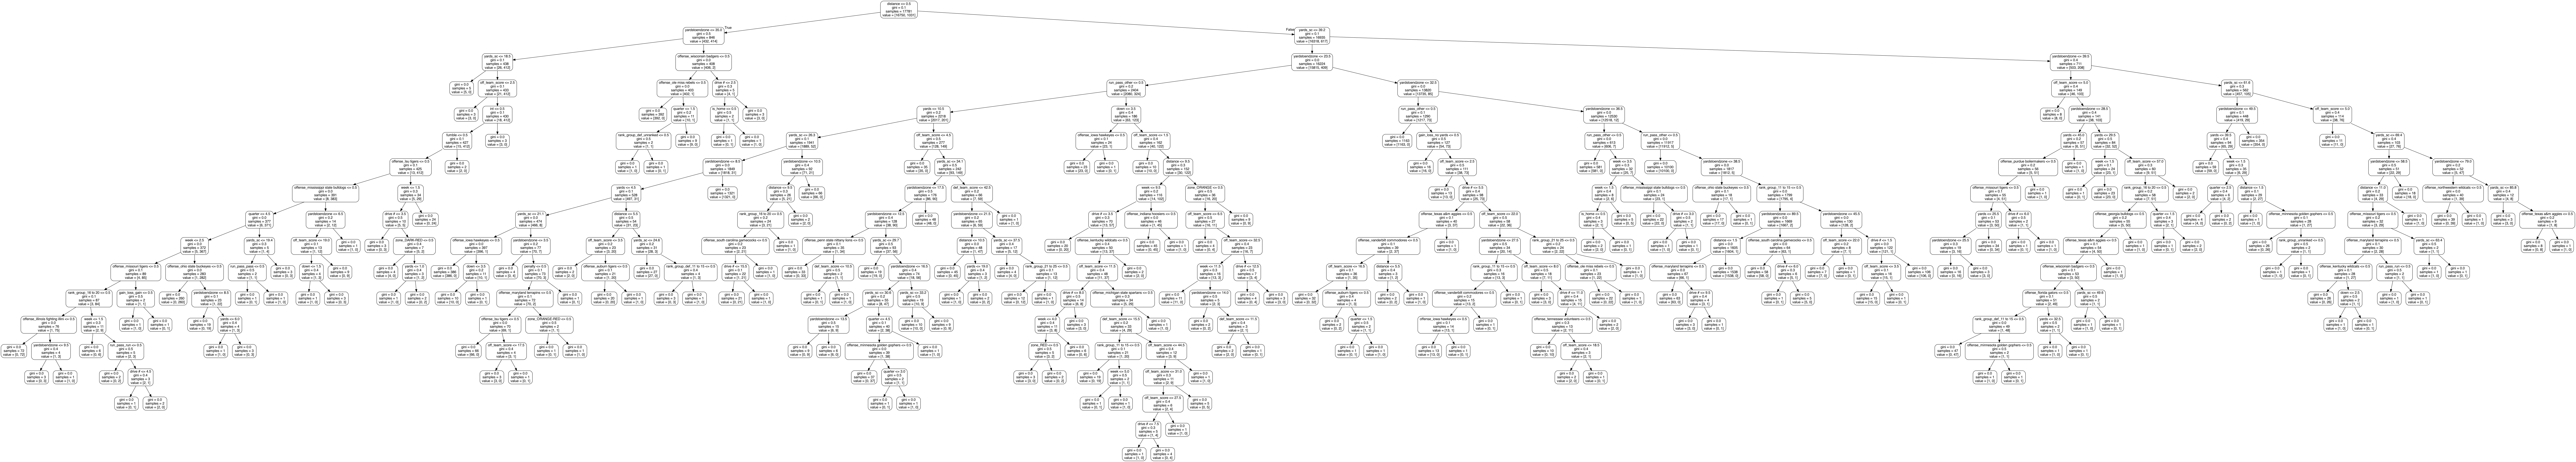

In [58]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image  


# Pull out one tree from the forest
tree = clf
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree =clf
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_score_train.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
#show image
Image(graph.create_png())

In [59]:
# tuning tree depth

accuracy = {}
precision = []
recall = []
labels = []

for i in range(3,18):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_score_train, y_score_train)
    y_pred = clf.predict(X_score_test)
    accuracy[i] = metrics.accuracy_score(y_score_test, y_pred)
    precision.append(metrics.precision_score(y_score_test, y_pred))
    recall.append(metrics.recall_score(y_score_test, y_pred))
    labels.append(i)

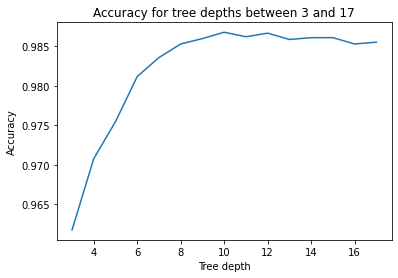

In [60]:
lists = accuracy.items() 

x, y = zip(*lists) 

plt.plot(x, y)
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.title('Accuracy for tree depths between 3 and 17')
plt.show();

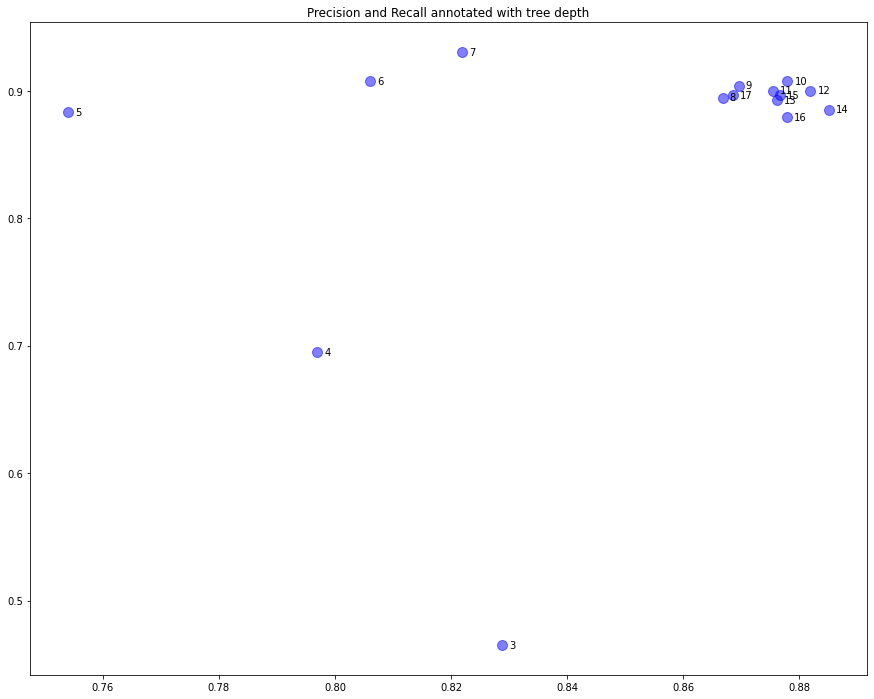

In [61]:
fig, ax = plt.subplots(1, figsize=(15, 12))

x = precision
y = recall


# Plot the scatter points
ax.scatter(x, y,
           color="blue",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

# Show the plot
plt.title('Precision and Recall annotated with tree depth')
plt.show();

<font size="4">

These two plots indicate that 10 is the optimal depth for this tree. The accuarcy plot also indicates that 4 and 6 might be options worth considering, as the accuracy increases at a lower rate after each of these depths. However, the Precision and Recall plot shows relatiely low precision and recall for a tree depth of 4. </font>

In [62]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_score_train, y_score_train)
y_pred_clf  = clf.predict(X_score_test)
print(metrics.accuracy_score(y_score_test, y_pred_clf))

0.9875556570384747


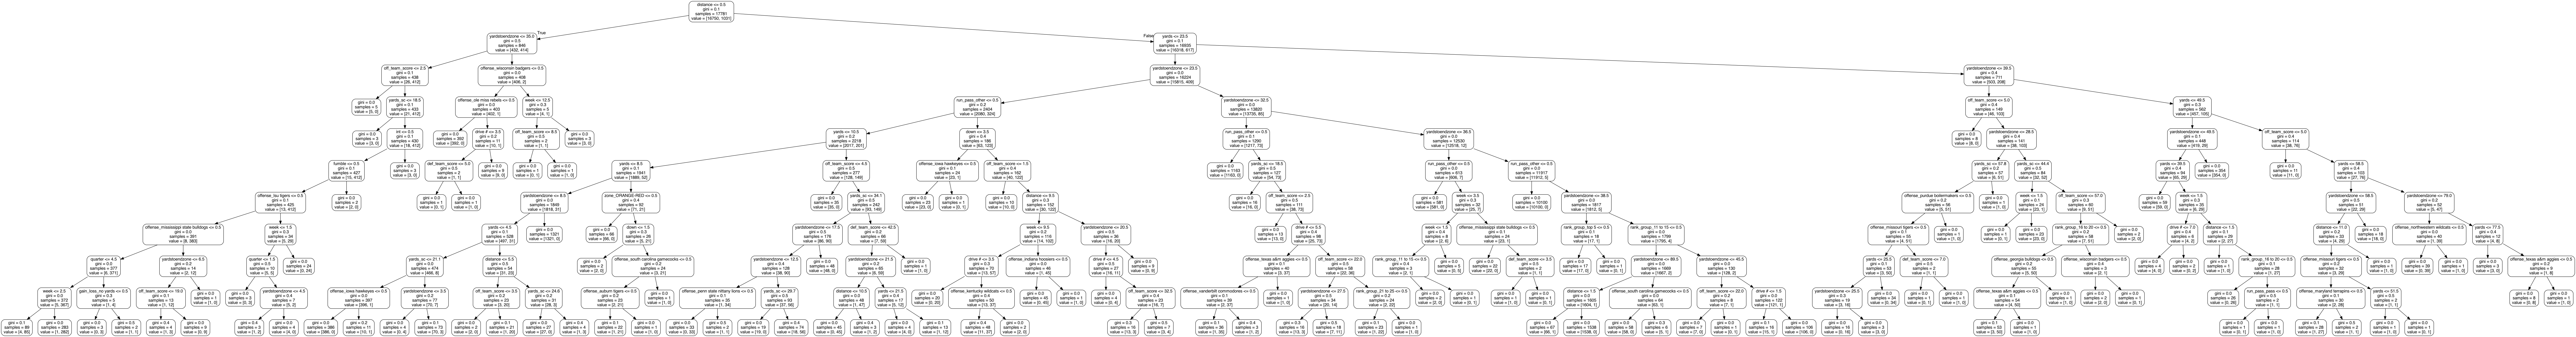

In [63]:
tree = clf
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_score_train.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
#show image
Image(graph.create_png())

In [64]:
print("Model - Max depth 10")
print("Accuracy:", metrics.accuracy_score(y_score_test, y_pred_clf))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_score_test, y_pred_clf))
print('Precision score' , metrics.precision_score(y_score_test, y_pred_clf))
print('Recall score' , metrics.recall_score(y_score_test, y_pred_clf))

Model - Max depth 10
Accuracy: 0.9875556570384747
Balanced accuracy: 0.9554996626282768
Precision score 0.8808664259927798
Recall score 0.9190207156308852


Some of the leaves still have very small sample sizes. Could also consider a depth of 4 or 6, as these are points at which the accuracy increases at a lower rate

0.9712295924192259


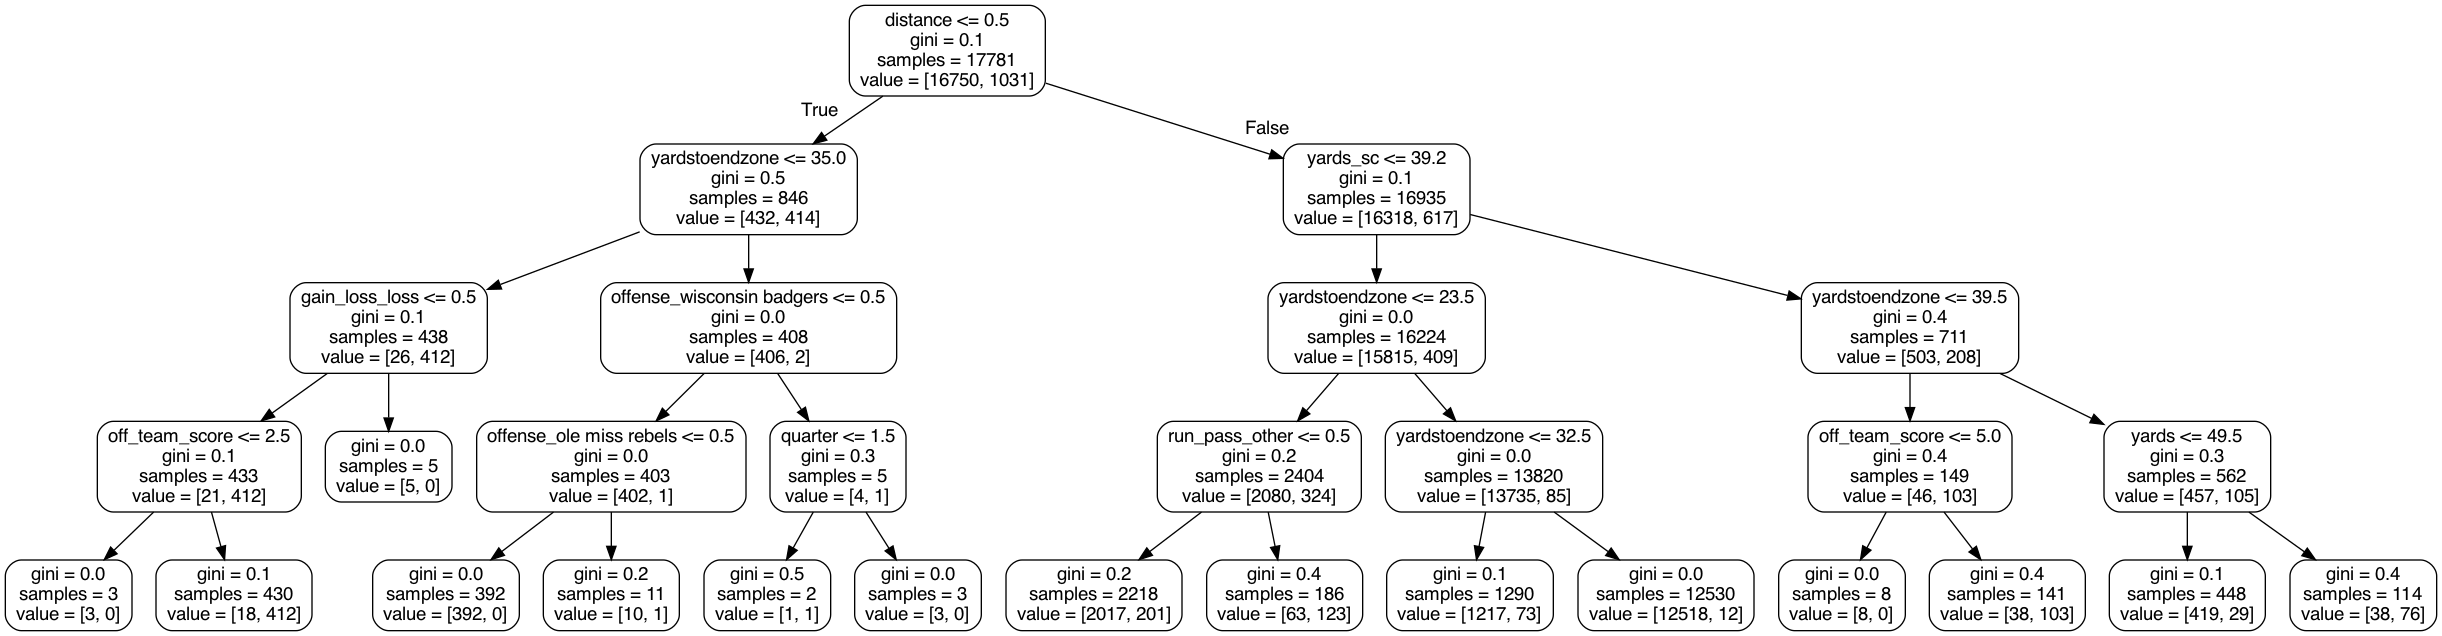

In [65]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_score_train, y_score_train)
y_pred_clf = clf.predict(X_score_test)
print(metrics.accuracy_score(y_score_test, y_pred_clf))


tree = clf
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_score_train.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
#show image
Image(graph.create_png())

In [66]:
print("Model - Max depth 4")
print("Accuracy:", metrics.accuracy_score(y_score_test, y_pred_clf))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_score_test, y_pred_clf))
print('Precision score' , metrics.precision_score(y_score_test, y_pred_clf))
print('Recall score' , metrics.recall_score(y_score_test, y_pred_clf))

Model - Max depth 4
Accuracy: 0.9712295924192259
Balanced accuracy: 0.8419884973179634
Precision score 0.803921568627451
Recall score 0.6949152542372882


0.9811622331316361


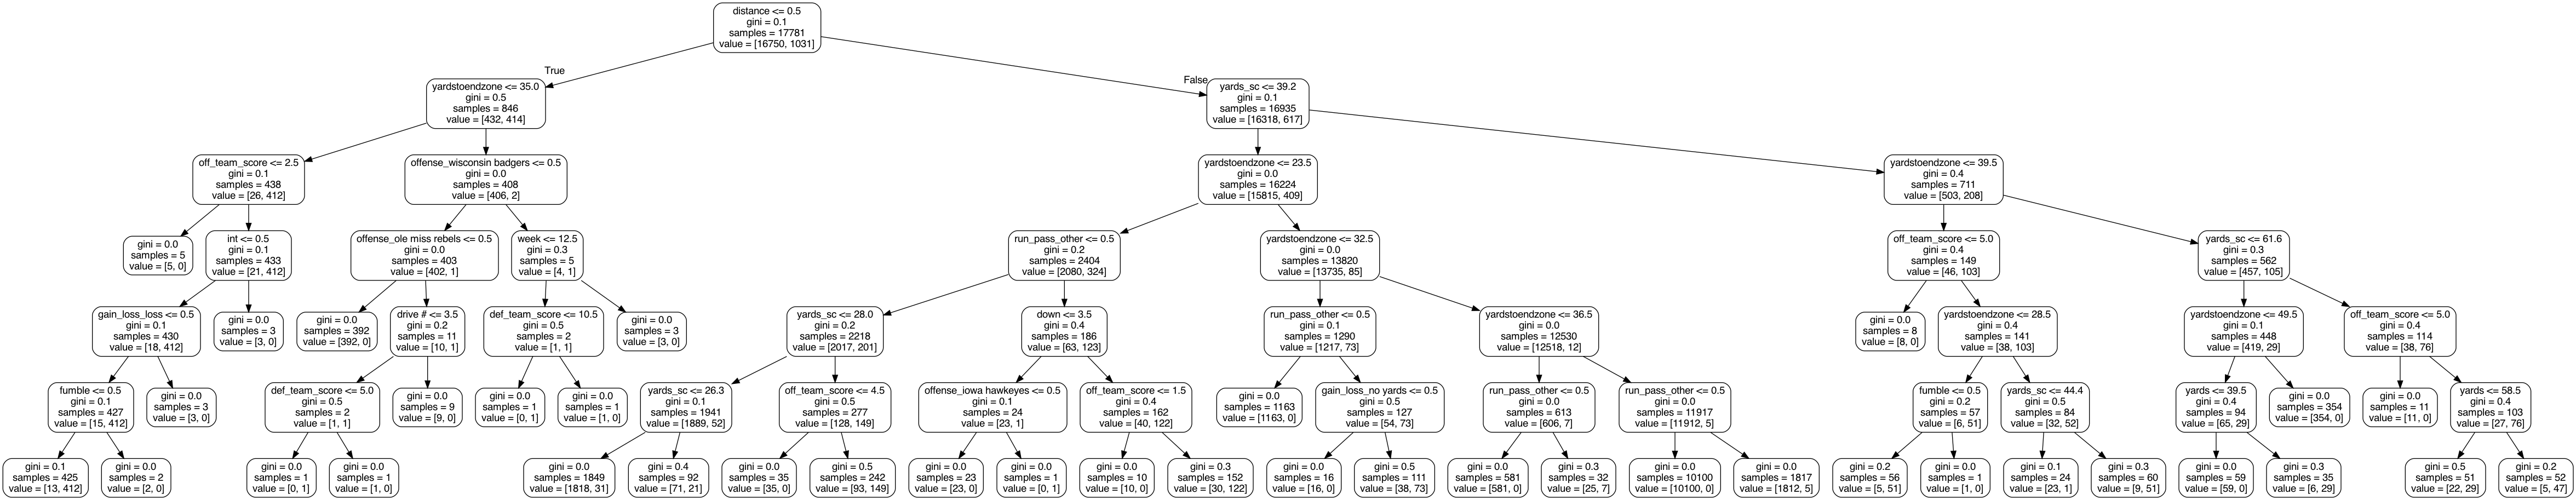

In [67]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_score_train, y_score_train)
y_pred_clf = clf.predict(X_score_test)
print(metrics.accuracy_score(y_score_test, y_pred_clf))

tree = clf
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_score_train.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
#show image
Image(graph.create_png())

In [68]:
print("Model - Max depth 6")
print("Accuracy:", metrics.accuracy_score(y_score_test, y_pred_clf))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_score_test, y_pred_clf))
print('Precision score' , metrics.precision_score(y_score_test, y_pred_clf))
print('Recall score' , metrics.recall_score(y_score_test, y_pred_clf))

Model - Max depth 6
Accuracy: 0.9811622331316361
Balanced accuracy: 0.94681153966933
Precision score 0.8060200668896321
Recall score 0.9077212806026366


In [69]:
importance = clf.feature_importances_

Feature: 0, Score: 0.00054
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01392
Feature: 3, Score: 0.21750
Feature: 4, Score: 0.34494
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00360
Feature: 7, Score: 0.00353
Feature: 8, Score: 0.00039
Feature: 9, Score: 0.02365
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00132
Feature: 12, Score: 0.04153
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00126
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00012
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

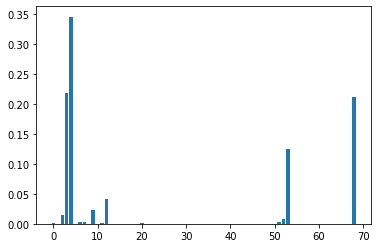

In [70]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v));
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

30


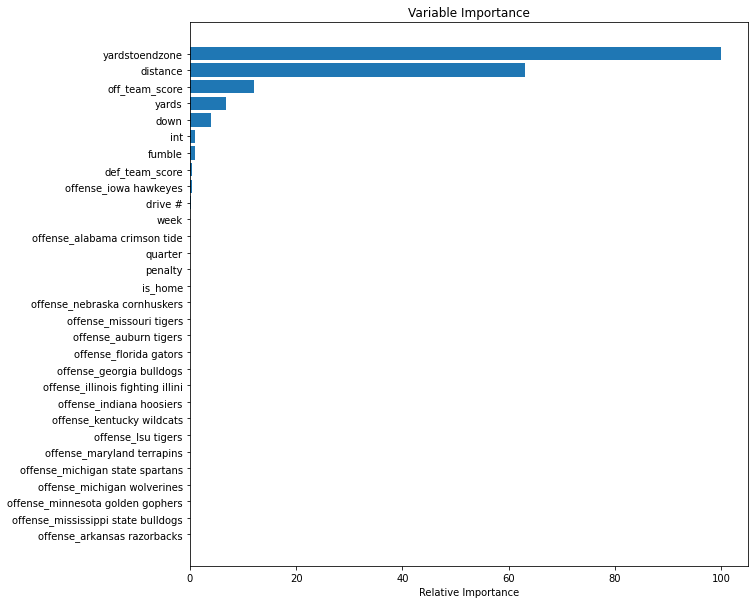

In [77]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_score_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

rf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = rf.fit(X_score_train, y_score_train)
y_pred = model_res.predict(X_score_test)


ac = accuracy_score(y_score_test, y_pred)

f1 = f1_score(y_score_test, y_pred, average='weighted')
#cm = confusion_matrix(y__score_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))


Random Forest: Accuracy=0.987
Random Forest: f1-score=0.987


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)


# Train the model on training data
rf.fit(X_score_train, y_score_train)

y_score_pred_rf = rf.predict(X_score_test)

print(accuracy_score(y_score_test, y_score_pred_rf))
print(f1_score(y_score_test, y_score_pred_rf))

0.9877839936065761
0.8993414863593602


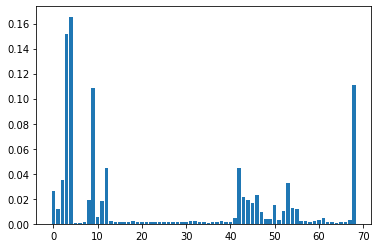

In [92]:
feature_importance = rf.feature_importances_

plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()

30


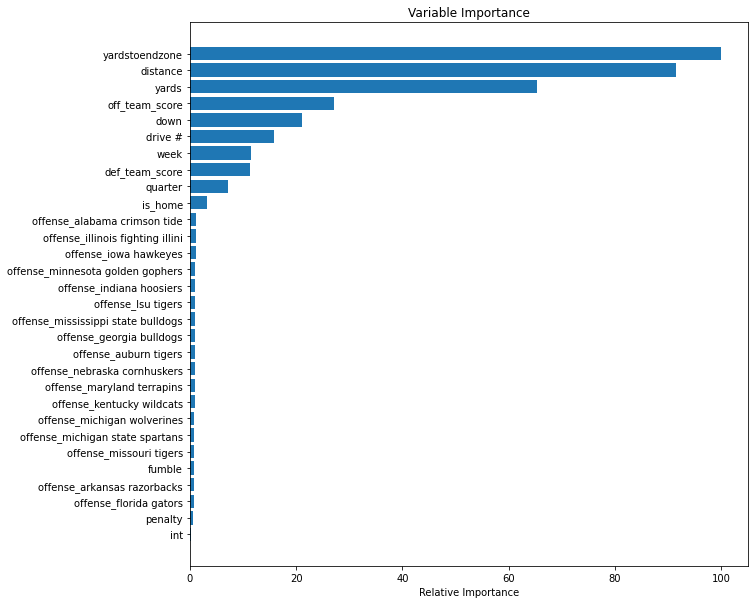

In [93]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_score_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [94]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_score_train.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [95]:
Image(graph.create_png())

In [ ]:
#hyperparameter tuning

# logistic regression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
lo_reg = LogisticRegression()

# Fit the model 
lo_reg.fit(X_score_train, y_score_train)

#predict
y_reg_pred = lo_reg.predict(X_score_test)

print(accuracy_score(y_score_test, y_reg_pred))

0.9818472428359402


/Users/regan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [115]:
# tuning C
Cs = [0.001, 0.1, 1, 10, 25, 50, 75, 100]

scores = {}

for c in Cs:
    reg = LogisticRegression(C=c)
    reg.fit(X_score_train, y_score_train)
    pred = reg.predict(X_score_test)
    scores[c] = np.sqrt(metrics.mean_squared_error(y_score_test, pred))

/Users/regan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/regan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

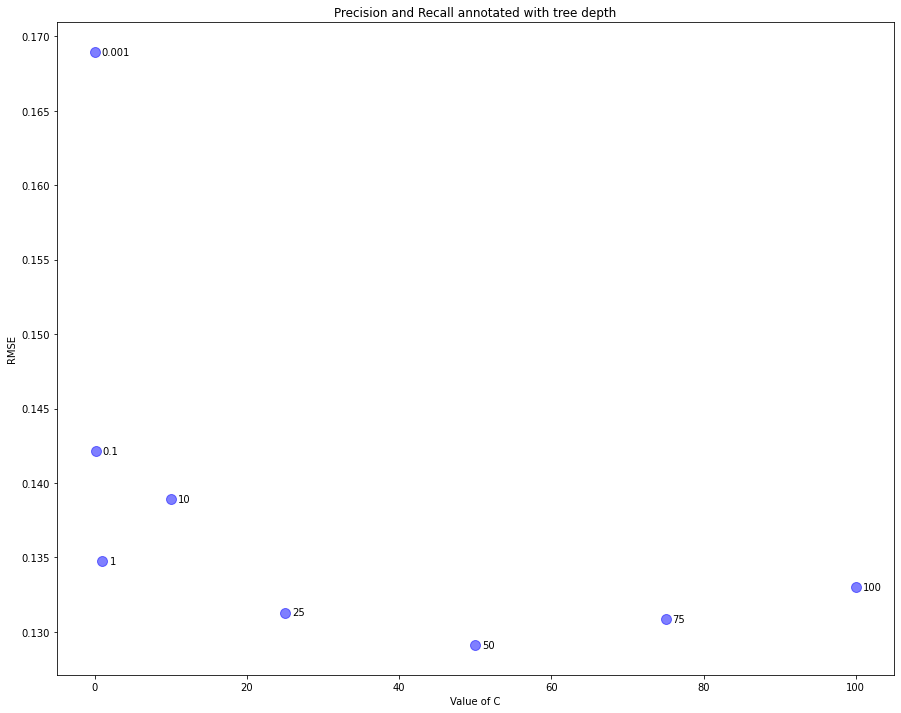

In [117]:
fig, ax = plt.subplots(1, figsize=(15, 12))

lists = scores.items() 

x, y = zip(*lists) 

labels = Cs

# Plot the scatter points
ax.scatter(x, y,
           color="blue",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

# Show the plot
plt.title('Precision and Recall annotated with tree depth')
plt.xlabel('Value of C')
plt.ylabel('RMSE')
plt.show();

In [ ]:
#ideal value for C appears to be 50

In [119]:
lo_reg = LogisticRegression(C=50)

# Fit the model 
lo_reg.fit(X_score_train, y_score_train)

#predict
y_reg_pred = lo_reg.predict(X_score_test)

print(accuracy_score(y_score_test, y_reg_pred))
print(np.sqrt(metrics.mean_squared_error(y_score_test, pred)))

0.9833314305285992
0.1330266290178664


/Users/regan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<h2 style="background-color:#FAFAD2;"><center><br>Modeling gain_loss</center>
</h2>

In [83]:
# decision tree

clf_gl = DecisionTreeClassifier()

clf_gl.fit(X_gl_train, y_gl_train)

y_score_pred_gl = clf_gl.predict(X_gl_test)

print("Accuracy:",metrics.accuracy_score(y_gl_test, y_score_pred_gl))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy: 1.0


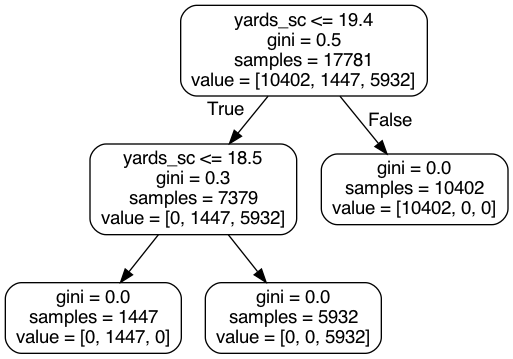

In [91]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = clf_gl
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree =clf_gl
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree_gl.dot', feature_names = X_gl_train.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_gl.dot')
# Write graph to a png file
graph.write_png('tree_gl.png')


Image(graph.create_png())

In [92]:
print(clf_gl.tree_.max_depth)

2


<h2 style="background-color:#FAFAD2;"><center><br>Modeling yards</center>
</h2>

In [ ]:
# random forest or decision tree

In [ ]:
# regression
# linear, 